In [59]:
from keras.datasets import imdb

## num_words=10000: 훈련 데이터에서 가장 지주 나타나는 단어 10000개만 시용하겠다는 의미
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [60]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [61]:
train_labels[0] ## 0: 부정, 1: 긍정

1

In [62]:
max([max(index) for index in train_data])

9999

In [63]:
## word_index: 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = imdb.get_word_index() 
## 정수 인덱스와 단어를 매핑하도록 뒤집음
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
## i의 값이 3보다 작으면 '?'로 대체 => 0: padding, 1: 문서 시작, 2: 사전에 없음
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [64]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    ## 크기가(len(sequences), dimension)이고 모든 원소가 0인 행렬을 만듦
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1. ## results[i]에사 특정 인덱스의 위치를 1로 만듦
    return results

In [65]:
x_train = vectorize_sequences(train_data) ## 훈련 데이터를 백터로 변환
x_test = vectorize_sequences(test_data) ## 테스트 데이터를 백터로 변환

In [66]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [67]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [68]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [69]:
model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=["accuracy"])

In [70]:
x_val = x_train[:10000] ## 검증 데이터
partial_x_train = x_train[10000:] ## 훈련 데이터 ## 15,000
y_val = y_train[:10000] ## 검증 레이블
partial_y_train = y_train[10000:] ## 훈련 레이들-15,000

In [71]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6861 - loss: 0.6075 - val_accuracy: 0.8510 - val_loss: 0.4155
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8859 - loss: 0.3558 - val_accuracy: 0.8755 - val_loss: 0.3294
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9175 - loss: 0.2608 - val_accuracy: 0.8776 - val_loss: 0.3005
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9355 - loss: 0.2045 - val_accuracy: 0.8895 - val_loss: 0.2757
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9459 - loss: 0.1700 - val_accuracy: 0.8805 - val_loss: 0.2981
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9574 - loss: 0.1410 - val_accuracy: 0.8862 - val_loss: 0.2809
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9678 - loss: 0.1152 - val_accuracy: 0.8817 - val_loss: 0.3091
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9675 - loss: 0.1091 - val_accuracy: 0.8836 - val_los

In [72]:
history_dict = history.history ## model.fit() 훈련정보를 딕셔너리에 반환

In [73]:
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

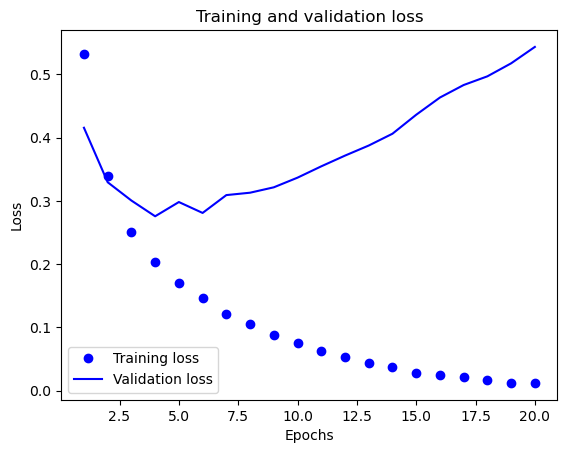

In [74]:
import matplotlib.pyplot as plt

history_dict = history.history
loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

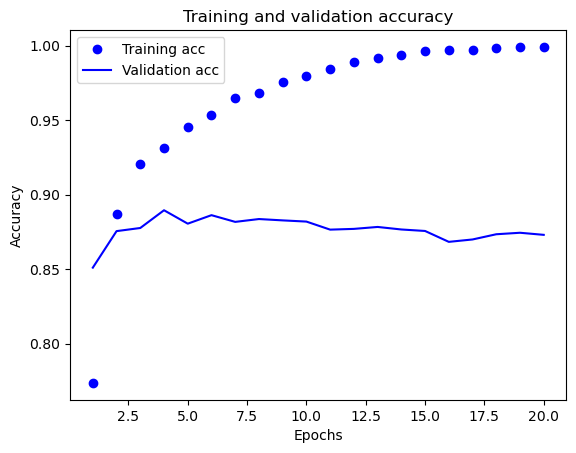

In [75]:
plt.clf() ## 그래프 초기화

acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, "bo", label="Training acc") ## bo는 파란색 점
plt.plot(epochs, val_acc, "b", label="Validation acc") ## b는 파란색 실선
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [76]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="rmsprop",
                loss="binary_crossentropy",
                metrics=["accuracy"])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6982 - loss: 0.5810
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9049 - loss: 0.2943
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9270 - loss: 0.2166
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9404 - loss: 0.1762
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 443us/step - accuracy: 0.8841 - loss: 0.2884


In [77]:
results = model.evaluate(x_test, y_test)
results

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 480us/step - accuracy: 0.8841 - loss: 0.2884


[0.28886720538139343, 0.8846799731254578]

In [78]:
model.predict(x_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step


array([[0.20702377],
       [0.99716586],
       [0.82015884],
       ...,
       [0.08283056],
       [0.06181711],
       [0.5992292 ]], dtype=float32)